### Data prediction task 

You’ve been asked to help the marketing team in increasing performance of their marketing campaign. The team wants to laverage Advanced Analytics to improve campaign targeting. In other words they want to identify customers for which the gain from being contacted is the highest. To establish a proof of concept they provided data from previous campaign for both control and targeted groups, which were selected at random from non-users before the campaign start. Aim of the campaign was to persuade customers to subscribe to the term deposit. The product (term deposit) was available also to the control group (but not marketed).

Assuming the total campaign budget is fixed calculate expected lift from using model predictions vs random selection (as done before).

We would like you to laverage relevant analytical methods to develop proof of concept for the next wave of the campaign (same message) and it’s expected lift. For results robustness please propose appropriate evaluation and validation framework.

In [1]:
import pandas as pd
import seaborn as sns
import sys
# add helepr function to python path
function_path = '../utils/'
sys.path.append(function_path)
# import helpers
import checks
import modeling
# set options to pandas and sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

%load_ext autoreload
%autoreload 2

In [2]:
DATA_PATH = '../data/bank_data_prediction_task.csv'
df = pd.read_csv(DATA_PATH, index_col = [0])

In [3]:
df.head()

age          job  marital            education  default housing loan    contact month day_of_week  duration  campaign  pdays  previous     poutcome  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y test_control_flag
1   37     services  married          high.school       no     yes   no  telephone   may         mon     226.0       1.0    999         0  nonexistent           1.1          93.994          -36.4      4.857       5191.0  no    campaign group
2   45     services  married             basic.9y  unknown      no   no  telephone   may         mon     198.0       1.0    999         0  nonexistent           1.1          93.994          -36.4      4.857       5191.0  no    campaign group
3   59       admin.  married  professional.course       no      no   no  telephone   may         mon     139.0       1.0    999         0  nonexistent           1.1          93.994          -36.4      4.857       5191.0  no    campaign group
4   25     services   single          high.school       no     yes   no  telephone   may         mon      50.0       1.0    999         0  nonexistent           1.1          93.994          -36.4      4.857       5191.0  no    campaign group
5   35  blue-collar  married             basic.6y       no     yes   no  telephone   may         mon     146.0       1.0    999         0  nonexistent           1.1          93.994          -36.4      4.857       5191.0  no    campaign group

In [4]:
checks.check_column_status(df)

Unique values for job are: services, admin., blue-collar, retired, technician, self-employed, management, entrepreneur, unemployed, student, housemaid, unknown
Unique values for marital are: married, single, unknown, divorced
Unique values for education are: high.school, basic.9y, professional.course, basic.6y, basic.4y, university.degree, unknown, illiterate
Unique values for default are: no, unknown, yes
Unique values for housing are: yes, no, unknown
Unique values for loan are: no, yes, unknown
Unique values for contact are: telephone, cellular, NAN
For contact we have 40.0% of NaN values
----------------------------
Unique values for month are: may, jun, jul, aug, oct, nov, dec, mar, apr, sep, NAN
For month we have 40.0% of NaN values
----------------------------
Unique values for day_of_week are: mon, tue, wed, thu, fri, NAN
For day_of_week we have 40.0% of NaN values
----------------------------
Unique values for poutcome are: nonexistent, failure, success
Unique values for y are

It can be seen that here we have Nan values which correspond to the control group. The same is true for the values in the month and day of week columns. Let's finally check if our guess is correct, it will allow us to divide the set and check its results.

In [ ]:
checks.check_group_status(df, control_group=True)
checks.check_group_status(df, control_group=False)

Unique values in control group for contact: NAN
Unique values in control group for month: NAN
Unique values in control group for day_of_week: NAN
Numbers of clients which not previously contacted: 96.30948527031403%
----------------------
The control group subscription term deposit
no     0.907575
yes    0.092425
Name: y, dtype: float64
----------------------
Unique values in campaigne group for contact: telephone.cellular
Unique values in campaigne group for month: may.jun.jul.aug.oct.nov.dec.mar.apr.sep
Unique values in campaigne group for day_of_week: mon.tue.wed.thu.fri
Numbers of clients which not previously contacted: 96.3401310997815%
----------------------
The campaigne group subscription term deposit
no     0.887351
yes    0.112649
Name: y, dtype: float64
----------------------


## Conversion rate baseline and desire lift

We want to check how high the conversion factor is and the lift score. In this way we will be able to compare our model to a random sample.

In [ ]:
data = checks.conversion_rate(df, 'all users')
campaign = checks.conversion_rate(df[df.test_control_flag == 'campaign group'], 'campaign group')
test = checks.conversion_rate(df[df.test_control_flag == 'control group'], 'control group')
print(f"Our changes with predictive model should be grater than {round(campaign-test,2)*100}%")

Conversion rate for all users is: 10.100000000000001%
Conversion rate for campaign group is: 11.3%
Conversion rate for control group is: 9.2%
Our changes with predictive model should be grater than 2.0%


## Visualization of the data

In [ ]:
from IPython.core.display import display, HTML
link = '<iframe width="1100" height="800" src="https://datastudio.google.com/embed/reporting/780d6e33-cd04-4741-9f5d-6fdc9335f947/page/4zfSB" frameborder="0" style="border:0" allowfullscreen></iframe>'
display(HTML(link))

The graphs show that education is not very important when borrowing money, the same is true for the level of education. It is worrying that we have many unknowns about education.
Retired people are more likely to choose a deposit offer compared to other professions. It can also be concluded that entrepreneurs and self-employed (who are a diverse social group in terms of earnings) should choose term deposits less frequently.
People who have loans or housing may be less willing to use the offer.

In [ ]:
df.groupby(['test_control_flag', 'y']).describe()

age                                                     campaign                                               cons.conf.idx                                                    cons.price.idx                                                              duration                                                            emp.var.rate                                              euribor3m                                                          nr.employed                                                                    pdays                                                          previous                                             
                         count       mean        std   min   25%   50%   75%   max    count      mean       std  min  25%  50%  75%   max         count       mean       std   min   25%   50%   75%   max          count       mean       std     min     25%     50%     75%     max    count        mean         std   min    25%    50%    75%     max        count      mean       std  min  25%  50%  75%  max     count      mean       std    min    25%    50%      75%    max       count         mean        std     min     25%     50%     75%     max    count        mean         std  min    25%    50%    75%    max    count      mean       std  min  25%  50%  75%  max
test_control_flag y                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        
campaign group    no   14620.0  39.948358   9.888862  17.0  32.0  38.0  47.0  92.0  14620.0  2.643707  2.888316  1.0  1.0  2.0  3.0  43.0       14620.0 -40.614213  4.378156 -50.8 -42.7 -41.8 -36.4 -26.9        14620.0  93.601297  0.556988  92.201  93.075  93.918  93.994  94.767  14620.0  222.510465  211.630765   0.0   96.0  165.0  281.0  4918.0      14620.0  0.239439  1.486362 -3.4 -1.8  1.1  1.4  1.4   14620.0  3.803418  1.639976  0.634  1.405  4.857  4.96100  4.970     14620.0  5175.892599  64.486829  4963.6  5099.1  5195.8  5228.1  5228.1  14620.0  984.670793  118.417776  0.0  999.0  999.0  999.0  999.0  14620.0  0.131943  0.405894  0.0  0.0  0.0  0.0  5.0
                  yes   1856.0  40.704203  13.557596  17.0  31.0  37.0  49.0  92.0   1856.0  2.074353  1.682275  1.0  1.0  2.0  3.0  23.0        1856.0 -39.686800  6.162345 -50.8 -46.2 -40.3 -36.1 -26.9         1856.0  93.341834  0.675221  92.201  92.893  93.200  93.918  94.767   1856.0  552.460129  411.227187  37.0  252.0  442.0  742.5  4199.0       1856.0 -1.243157  1.621362 -3.4 -1.8 -1.8 -0.1  1.4    1856.0  2.107616  1.737376  0.634  0.851  1.266  4.23875  4.970      1856.0  5094.992511  87.017409  4963.6  5017.5  5099.1  5191.0  5228.1   1856.0  789.216595  405.526890  0.0  999.0  999.0  999.0  999.0   1856.0  0.494612  0.869968  0.0  0.0  0.0  1.0  6.0
control group     no   22428.0  39.912877  10.032430  17.0  32.0  38.0  47.0  98.0      0.0       NaN       NaN  NaN  NaN  NaN  NaN   NaN       22428.0 -40.568205  4.447022 -50.8 -42.7 -41.8 -36.4 -26.9        22315.0  93.601040  0.562962  92.201  93.075  93.918  93.994  94.767      0.0         NaN         NaN   NaN    NaN    NaN    NaN     NaN      22428.0  0.222427  1.499251 -3.4 -1.8  1.1  1.4  1.4   22428.0  3.779532  1.657812  0.634  1.405  4.857  4.96200  5.045     22428.0  5174.575941  66.285750  4963.6  5099.1  5195.8  5228.1  5228.1  22428.0  979.653424  137.245659  0.0  999.0  999.0  999.0  999.0  22428.0  0.140672  0.431988  0.0  0.0  0.0  0.0  7.0
                  y

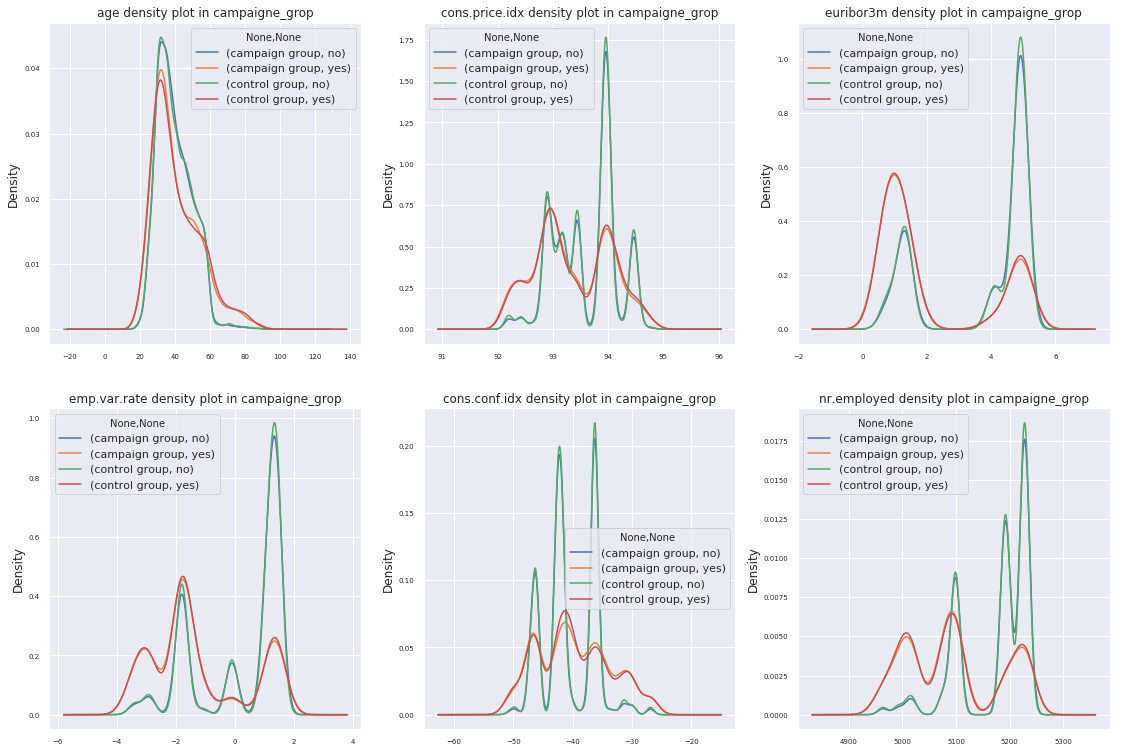

In [ ]:
check_density = ['age',
                 'emp.var.rate',
                 'cons.price.idx',
                 'cons.conf.idx',
                 'euribor3m',
                 'nr.employed']
r = 2
c = 3

fig, axes = plt.subplots(r,c, figsize=(19,13))

k = 0
for i in range(c):
    for j in range(r):
        col = check_density[k]
        df.groupby(['test_control_flag', 'y'])[col].plot(legend=True, kind='kde', ax=axes[j][i], fontsize=7,
                                                     title=f"{col} density plot in campaigne_grop")
        k += 1

In terms of distribution for individual values, the test group and campaign are not differentiated.
Economic and social values differ significantly, which is best seen in the distribution of the euribor3m coefficient - a higher coefficient may determine less likelihood of using the offer. It is similar to the coefficients emp.var.rate and nr.employed.
The situation with lower values is already uncertain, the model may be wrong with such values if we take them during training.

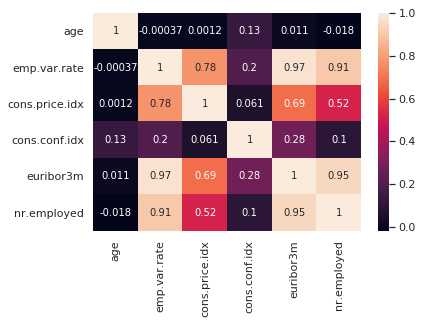

In [ ]:
Var_Corr = df[check_density].corr()
# plot the heatmap and annotation on it
sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=True)

There is a high correlation of emp.var.rate to nremployed, euribon3m and con.price index.
We should leave the euriborm coefficient (it is calculated daily, therefore it can be more accurate). We also reject coefficient nr.employed because it is quarterly, similarly to emp.var.rate

## Modeling part

For modeling, we will pre-use data on **euribor 3m, age, marital status, loan, housing, cons.conf.idx,, cons.price.idx and job**.  
**models**: logistic regression, knn, catboost  
**loss**: logloss  
**metrics**: accuracy

In [ ]:
df = pd.read_csv(DATA_PATH, index_col = [0])
to_model = ['euribor3m', 'age', 'marital', 'loan', 'housing', 'job', 'nr.employed', 'cons.conf.idx', 'cons.price.idx']
data_dict = modeling.split_data(df, columns=to_model, transform='factorize')
# split camapigne group
X, y = data_dict['campaign']
X_val, y_val = data_dict['test']

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
# Import the scikitplot module
import scikitplot as skplt

def _confusion_score(predict, true):
    cm = confusion_matrix(true, predict)
    return {"TP": cm[0, 0], "FN": cm[0, 1],
            "FN": cm[1, 0], "TN": [cm[1, 1]]}

def train_validate(train: dict, model_fn, cat_index: list = None, 
                   kfold: int = 10, plot: bool = True):
    """"""
    try: 
        name = type(model).__name__
    except Exception as e:
        name = 'None'
    acc = list()
    roc_auc = list()
    c_matrix = list()
    models = list()
    # make train/test dataset
    X = train['X']
    y = train['y']
    kf = model_selection.KFold(n_splits=kfold, random_state=1, shuffle=True)
    for i, (train_idx, test_idx) in enumerate(kf.split(X)):
        model = model_fn
        y_train, y_valid = y.iloc[train_idx].copy(), y.iloc[test_idx]
        X_train, X_valid = X.iloc[train_idx, :].copy(), X.iloc[test_idx, :].copy()
        if cat_index is not None:
            # works only for catboost
            fit_ = model.fit(X_train, y_train,
                             cat_features=cat_index, verbose=0)
        else:
            fit_ = model.fit(X_train, y_train)
        predict = model.predict(X_valid)
        # get base metrics
        acc.append(accuracy_score(y_valid, predict))
        roc_auc.append(roc_auc_score(y_valid, predict))
        c_matrix.append(_confusion_score(predict, y_valid))
        models.append(model)
    TP = [res['TP'] for res in c_matrix]
    TN = [res['TN'] for res in c_matrix]
    print(f"{name}: {round(np.mean(acc), 3)} accuracy with {round(np.std(acc), 3)} std")
    print(f"{name}: {round(np.mean(roc_auc), 3)} AUC  with {round(np.std(roc_auc), 3)} std")
    if plot is True:
        plt.boxplot(acc)
        ax.set_xticklabels(names)
        plt.show()
    return models

def predict_model(test, models, roc_auc: bool = True, lift: bool = True):
    proba = list()
    for model in models:
        proba.append(model.predict_proba(test['X']))
    
    pred_val = np.mean(proba, axis=0)
    pred_std = np.std(proba, axis=0)
    if roc_auc is True:
        fpr, tpr, _ = roc_curve(test['y'], pred_val[:, 1])
        roc_auc = auc(fpr, tpr)
        plt.title('Receiver Operating Characteristic')
        plt.plot(fpr, tpr, label='AUC = %0.4f'% roc_auc)
        plt.legend(loc='lower right')
        plt.plot([0,1],[0,1],'r--')
        plt.xlim([-0.001, 1])
        plt.ylim([0, 1.001])
        plt.ylabel('True Positive Rate')
        plt.xlabel('False Positive Rate')
        plt.show()
    if lift is True:
        # Plot the lift curve
        skplt.metrics.plot_lift_curve(test['y'], pred_val)
        plt.show()
    return proba

### SGD Classifier

SGDClassifier: 0.826 accuracy with 0.115 std
SGDClassifier: 0.565 AUC  with 0.082 std


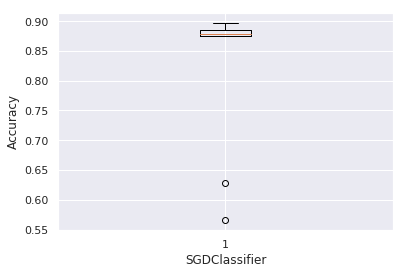

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier

scalar = StandardScaler()
model = SGDClassifier(loss='log', max_iter=1000, early_stopping=True, alpha=0.001)
pipeline = Pipeline([('transformer', scalar), ('estimator', model)])
train = dict()
train['X'] = X
train['y'] = y
models = modeling.train_validate(train, model, kfold=10)

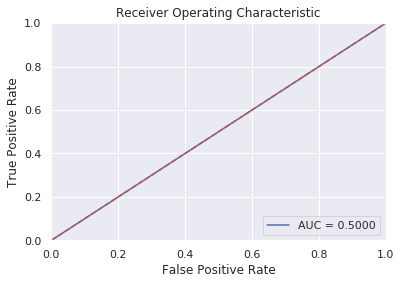

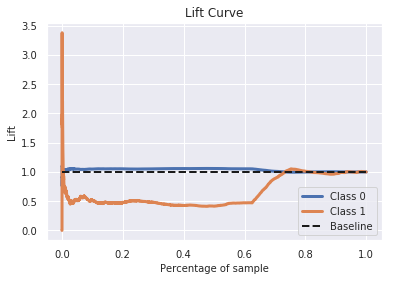

In [ ]:
validation = {'X': X_val, 'y': y_val}
proba = modeling.predict_model(validation, models)

### KNeighbors Classifier

KNeighborsClassifier: 0.865 accuracy with 0.01 std
KNeighborsClassifier: 0.59 AUC  with 0.016 std


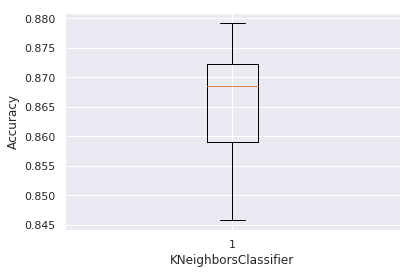

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(weights='distance', n_neighbors=7)
train = dict()
train['X'] = X
train['y'] = y
models = modeling.train_validate(train, knn, kfold=10)

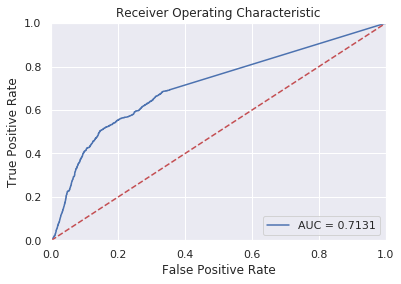

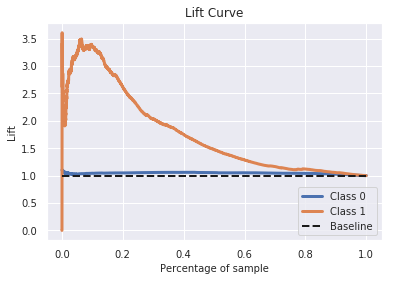

In [ ]:
validation = {'X': X_val, 'y': y_val}
proba = modeling.predict_model(validation, models)

In [ ]:
from catboost import CatBoostClassifier
import numpy as np

# create dictionary of parameters
params = {'iterations': 1500,
          'learning_rate': 0.01,
          'l2_leaf_reg': 3.5,
          'depth': 6,
          'loss_function': 'Logloss',
          'eval_metric': 'AUC',
          'random_seed': 42}

train = dict()
train['X'] = X
train['y'] = y
cat_index = np.where(X.dtypes == 'category')[0]
models = modeling.train_validate(train, CatBoostClassifier(**params), cat_index, kfold=10)

In [ ]:
validation = {'X': X_val, 'y': y_val}
proba = modeling.predict_model(validation, models)

### Conclusion of modeling part

The experiment was performed for three classification algorithms using cross-validation for 10 folds

**SGD Classifier**: The classic regression model with gradient descent optimization performed the least well on the test sample. The model overfits the values in the sample, as seen in the cross-validation chart. The AUC graph indicates that the model does not deviate too much from random selection. The result could be improved by converting the categorical data into continuous values or by expanding the data with more positive values.
Expected Lift analysis indicates that the model works randomly e.g trial 0.4 begins to predict values below the expected baseline

**KNN**: The classic KNN model with its seven closest neighbors is doing much better than the regression model. The area under the curve with a score of 0.71 can be considered a good model that still requires data enrichment or a positive sample extension.
The growth curve for levels up to 0.4 of the entire sample indicates that the model is better than the randomly selected test group almost twice.

**CatBoost**: We used the catboost model because it has built-in methods for converting categorical data to continuous values which could help with model predictions. The AUC graph indicates that the model is better by 0.06 points compared to KNN, which is an **increase of 8%**.
The use of this model should result in a maximum increase in sales of the offer up to **five times** to new users. Based only on data that does not require the participation of the sales department.

### improvements and final thought

Finally, with the help of simple machine learning models and with a small sample of data, we were able to create a solution that should help direct the offer to a better target group, thus saving time in the marketing department. Using the simple KNN model, we can increase sales up to 3 times compared to the test group.

The next step of the analysis should be the analysis of model features important to build more robust features. For this, you can use shape values, permutations, topological analysis, and other model clarification tools to better target the campaign and see what persons can be invalid classified.
The parameters of the final model should be adjusted using parameter search methods (grid search, bayesian search).
If that does not help a lot of synthetic extension of the data set with positive values can be used.